In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import PIL.Image
import pandas as pd
import time
from datetime import timedelta
import math
import dataset_novalid
import random
import os
import cache

In [2]:
import vgg16
from vgg16 import transfer_values_cache
from vgg16 import transfer_values_calc

In [3]:
vgg16.maybe_download()
model=vgg16.VGG16()

Data has apparently already been downloaded and unpacked.


In [4]:
classes=['0','1','2','3','4','5','6','7','8','9','A','A_LOW','B','B_LOW','C','C_LOW','D','D_LOW','E','E_LOW','F','F_LOW','G',
         'G_LOW','H','H_LOW','I','I_LOW','J','J_LOW','K','K_LOW','L','L_LOW','M','M_LOW','N','N_LOW','O','O_LOW','P','P_LOW','Q',
         'Q_LOW','R','R_LOW','S','S_LOW','T','T_LOW','U','U_LOW','V','V_LOW','W','W_LOW','X','X_LOW','Y','Y_LOW','Z','Z_LOW']
class_numbers=list(range(62))
num_classes=len(classes)
num_channels=3
img_size = 128
#custom paths
train_path = 'C:/Users/Konstantin/Machine Learning/NIST Handwritten project/NIST/train'
test_path = 'C:/Users/Konstantin/Machine Learning/NIST Handwritten project/NIST/test'
cache_path= 'C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST'

In [5]:
#first time loading
train_data = dataset_novalid.read_train_sets(train_path, img_size, classes)
test_data = dataset_novalid.read_test_set(test_path, img_size,classes)

Reading training images
Loading 0 files (Index: 0)
Loading 1 files (Index: 1)
Loading 2 files (Index: 2)
Loading 3 files (Index: 3)
Loading 4 files (Index: 4)
Loading 5 files (Index: 5)
Loading 6 files (Index: 6)
Loading 7 files (Index: 7)
Loading 8 files (Index: 8)
Loading 9 files (Index: 9)
Loading A files (Index: 10)
Loading A_LOW files (Index: 11)
Loading B files (Index: 12)
Loading B_LOW files (Index: 13)
Loading C files (Index: 14)
Loading C_LOW files (Index: 15)
Loading D files (Index: 16)
Loading D_LOW files (Index: 17)
Loading E files (Index: 18)
Loading E_LOW files (Index: 19)
Loading F files (Index: 20)
Loading F_LOW files (Index: 21)
Loading G files (Index: 22)
Loading G_LOW files (Index: 23)
Loading H files (Index: 24)
Loading H_LOW files (Index: 25)
Loading I files (Index: 26)
Loading I_LOW files (Index: 27)
Loading J files (Index: 28)
Loading J_LOW files (Index: 29)
Loading K files (Index: 30)
Loading K_LOW files (Index: 31)
Loading L files (Index: 32)
Loading L_LOW file

In [6]:
from cache import cache_nof
#custom cache paths
images_train_data_path = os.path.join(cache_path, 'images_train_2.pkl')
cls_train_data_path=os.path.join(cache_path, 'cls_train_2.pkl')
labels_train_data_path=os.path.join(cache_path, 'labels_train_2.pkl')
ids_train_data_path=os.path.join(cache_path, 'ids_train_2.pkl')
images_test_data_path=os.path.join(cache_path, 'images_test_2.pkl')
cls_test_data_path=os.path.join(cache_path, 'cls_test_2.pkl')
ids_test_data_path=os.path.join(cache_path, 'ids_test_2.pkl')
labels_test_data_path=os.path.join(cache_path, 'labels_test_2.pkl')

images_train=cache_nof(images_train_data_path,train_data.train.images)
cls_train=cache_nof(cls_train_data_path,train_data.train.cls)
labels_train=cache_nof(labels_train_data_path,train_data.train.labels)
ids_train=cache_nof(ids_train_data_path,train_data.train.ids)
images_test=cache_nof(images_test_data_path,test_data.test.images)
cls_test=cache_nof(cls_test_data_path,test_data.test.cls)
labels_test=cache_nof(labels_test_data_path,test_data.test.labels)
ids_test=cache_nof(ids_test_data_path,test_data.test.ids)

- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\images_train_2.pkl
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\cls_train_2.pkl
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\labels_train_2.pkl
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\ids_train_2.pkl
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\images_test_2.pkl
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\cls_test_2.pkl
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\labels_test_2.pkl
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\ids_test_2.pkl


In [7]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(train_data.train.labels)))
print("- Test-set:\t\t{}".format(len(test_data.test.labels)))
def plot_images(images, cls_true, cls_pred=None):
    
    if len(images) == 0:
        print("no images to show")
        return 
    else:
        random_indices = random.sample(range(len(images)), min(len(images), 9))
        
        
    images, cls_true  = zip(*[(images[i], cls_true[i]) for i in random_indices])
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):

        ax.imshow(images[i].reshape(img_size, img_size, num_channels))


        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

Size of:
- Training-set:		100000
- Test-set:		31000


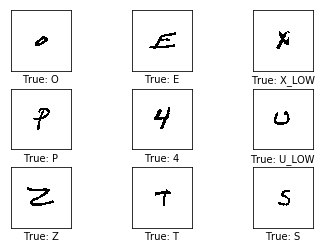

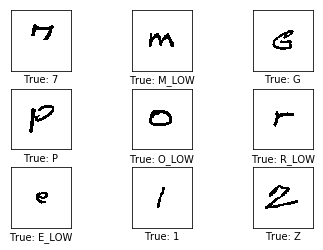

In [8]:
plot_images(images=images_train, cls_true=cls_train)
plot_images(images=images_test, cls_true=cls_test)

In [9]:
file_path_cache_train = os.path.join(cache_path, 'vgg16_train_full_pool5_2.pkl')
file_path_cache_test = os.path.join(cache_path, 'vgg16_test_full_pool5_2.pkl')


In [10]:
print("Processing VGG 16 transfer-values for training-images ...")

transfer_values_train = transfer_values_cache(cache_path=file_path_cache_train,
                                              images=images_train,
                                              model=model)

Processing VGG 16 transfer-values for training-images ...
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\vgg16_train_full_pool5_2.pkl


In [11]:
print("Processing VGG 16 transfer-values for test-images ...")

transfer_values_test = transfer_values_cache(cache_path=file_path_cache_test,
                                             images=images_test,
                                             model=model)

Processing VGG 16 transfer-values for test-images ...
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\vgg16_test_full_pool5_2.pkl


In [12]:
transfer_values_train_r=transfer_values_train.reshape(len(train_data.train.labels),8192)
transfer_values_test_r=transfer_values_test.reshape(len(test_data.test.labels),8192)

In [13]:
transfer_len=8192
cls_test = np.array([label.argmax() for label in labels_test])
fc_size=2048

In [14]:
x = tf.placeholder(tf.float32, shape=[None, transfer_len], name='x')
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)
keep_prob=0.5
tf_reg=2e-3

In [15]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))
def new_fc_layer(input,          
                 num_inputs,     
                 num_outputs,
                 keep_prob,
                 l2_loss,
                 use_relu=True,
                use_dropout=True,
                ): 

    
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)
    result_loss=l2_loss*tf.nn.l2_loss(weights)
   
    layer = tf.matmul(input, weights) + biases

    
    if use_relu:
        layer = tf.nn.relu(layer)
    if use_dropout:
        layer = tf.nn.dropout(layer,keep_prob)
    return layer,result_loss

In [16]:
def random_batch():
    
    num_images = len(transfer_values_train_r)

    
    idx = np.random.choice(num_images,
                           size=train_batch_size,
                           replace=False)

    
    x_batch = transfer_values_train_r[idx]
    y_batch = labels_train[idx]

    return x_batch, y_batch


In [17]:
layer_fc1,fc1_loss = new_fc_layer(input=x,
                         num_inputs=transfer_len,
                         num_outputs=fc_size,
                         l2_loss=tf_reg,
                         keep_prob=keep_prob,
                         use_relu=True,
                        use_dropout=False)

In [18]:
layer_fc2,fc2_loss = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=fc_size,
                         l2_loss=tf_reg,
                         keep_prob=keep_prob,
                         use_relu=True,
                        use_dropout=False)

In [19]:
layer_fc3,fc3_loss = new_fc_layer(input=layer_fc2,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         l2_loss=tf_reg,
                         keep_prob=keep_prob,
                         use_relu=False,use_dropout=False)

In [20]:
y_pred = tf.nn.softmax(layer_fc3)
y_pred_cls = tf.argmax(y_pred, dimension=1)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc3,
                                                        labels=y_true)
cost = tf.reduce_mean(cross_entropy)+fc1_loss+fc2_loss+fc3_loss
global_step = tf.Variable(initial_value=0,
                          name='global_step', trainable=False)

optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost, global_step)
y_pred_cls = tf.argmax(y_pred, dimension=1)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [21]:
session = tf.Session()
session.run(tf.global_variables_initializer())
train_batch_size = 1000
saver = tf.train.Saver()

In [22]:
save_dir = 'checkpoints/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_path = os.path.join(save_dir, 'best_training-2')
save_path_2=os.path.join(save_dir, 'best_test-2')
best_training_accuracy = 0.0
best_test_accuracy=0.0

In [23]:
def optimize(num_iterations):
    
    start_time = time.time()
    global best_training_accuracy
    for i in range(num_iterations):
        
        x_batch, y_true_batch = random_batch()
        
       
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}
        
        
        i_global, _ = session.run([global_step, optimizer],
                                  feed_dict=feed_dict_train)
        
       
        if (i_global % 100 == 0) or (i == num_iterations - 1):
            
            batch_acc = session.run(accuracy,
                                    feed_dict=feed_dict_train)
            
            if batch_acc >= best_training_accuracy:
                
                best_training_accuracy = batch_acc

                
                saver.save(sess=session, save_path=save_path)

                
                improved_str = '*'
            else:
                
                improved_str = ''
            
            msg = "Global Step: {0:>6}, Training Batch Accuracy: {1:>6.1%} {2}"
            print(msg.format(i_global, batch_acc,improved_str))
            print_accuracy_test()

    
    end_time = time.time()

    
    time_dif = end_time - start_time

    
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

In [24]:
def plot_example_errors(cls_pred, correct):
    
    incorrect = (correct == False)
    
   
    images = images_test[incorrect]
    
    
    cls_pred = cls_pred[incorrect]

    
    cls_true = cls_test[incorrect]

    n = min(9, len(images))
    
    # Plot the first n images.
    plot_images(images=images[0:n],
                cls_true=cls_true[0:n],
                cls_pred=cls_pred[0:n])

In [25]:
feed_dict_test = {x: transfer_values_test_r,
                  y_true: labels_test}
feed_dict_train = {x: transfer_values_train_r,
                  y_true: labels_train}


In [27]:
def print_accuracy_test():
    global best_test_accuracy
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    if acc>=best_test_accuracy:
        best_test_accuracy=acc
        saver.save(sess=session, save_path=save_path_2)
        print("Accuracy on test-set: {0:.1%}**".format(acc))
    else: print("Accuracy on test-set: {0:.1%}".format(acc))

In [28]:

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cls_pred):
    
    cm = confusion_matrix(y_true=cls_test,  
                          y_pred=cls_pred)  

    
    for i in range(num_classes):
       
        class_name = "({}) {}".format(i, classes[i])
        print(cm[i, :], class_name)

    
    class_numbers = [" ({0})".format(i) for i in range(num_classes)]
    print("".join(class_numbers))

In [29]:
print_accuracy_test()

Accuracy on test-set: 2.3%**


In [30]:
optimize(num_iterations=1)

Global Step:      1, Training Batch Accuracy:   3.5% *
Accuracy on test-set: 2.9%**
Time usage: 0:00:05


In [31]:
optimize(num_iterations=1000)

Global Step:    100, Training Batch Accuracy:  65.7% *
Accuracy on test-set: 63.2%**
Global Step:    200, Training Batch Accuracy:  73.1% *
Accuracy on test-set: 71.0%**
Global Step:    300, Training Batch Accuracy:  77.6% *
Accuracy on test-set: 76.5%**
Global Step:    400, Training Batch Accuracy:  82.7% *
Accuracy on test-set: 80.2%**
Global Step:    500, Training Batch Accuracy:  84.6% *
Accuracy on test-set: 82.4%**
Global Step:    600, Training Batch Accuracy:  87.9% *
Accuracy on test-set: 84.5%**
Global Step:    700, Training Batch Accuracy:  88.4% *
Accuracy on test-set: 86.1%**
Global Step:    800, Training Batch Accuracy:  90.7% *
Accuracy on test-set: 88.7%**
Global Step:    900, Training Batch Accuracy:  91.5% *
Accuracy on test-set: 89.9%**
Global Step:   1000, Training Batch Accuracy:  91.3% 
Accuracy on test-set: 90.0%**
Global Step:   1001, Training Batch Accuracy:  91.5% *
Accuracy on test-set: 89.9%
Time usage: 0:03:42


In [32]:
optimize(num_iterations=1000)

Global Step:   1100, Training Batch Accuracy:  93.7% *
Accuracy on test-set: 91.0%**
Global Step:   1200, Training Batch Accuracy:  94.2% *
Accuracy on test-set: 91.9%**
Global Step:   1300, Training Batch Accuracy:  93.3% 
Accuracy on test-set: 91.5%
Global Step:   1400, Training Batch Accuracy:  96.0% *
Accuracy on test-set: 94.1%**
Global Step:   1500, Training Batch Accuracy:  95.9% 
Accuracy on test-set: 93.2%
Global Step:   1600, Training Batch Accuracy:  96.3% *
Accuracy on test-set: 94.3%**
Global Step:   1700, Training Batch Accuracy:  95.7% 
Accuracy on test-set: 94.3%
Global Step:   1800, Training Batch Accuracy:  96.6% *
Accuracy on test-set: 95.2%**
Global Step:   1900, Training Batch Accuracy:  95.8% 
Accuracy on test-set: 95.3%**
Global Step:   2000, Training Batch Accuracy:  96.8% *
Accuracy on test-set: 94.5%
Global Step:   2001, Training Batch Accuracy:  96.7% 
Accuracy on test-set: 95.0%
Time usage: 0:03:29


In [33]:
optimize(num_iterations=1000)

Global Step:   2100, Training Batch Accuracy:  97.2% *
Accuracy on test-set: 95.2%
Global Step:   2200, Training Batch Accuracy:  96.9% 
Accuracy on test-set: 96.2%**
Global Step:   2300, Training Batch Accuracy:  97.4% *
Accuracy on test-set: 96.6%**
Global Step:   2400, Training Batch Accuracy:  97.6% *
Accuracy on test-set: 96.3%
Global Step:   2500, Training Batch Accuracy:  98.0% *
Accuracy on test-set: 95.8%
Global Step:   2600, Training Batch Accuracy:  97.6% 
Accuracy on test-set: 96.0%
Global Step:   2700, Training Batch Accuracy:  97.7% 
Accuracy on test-set: 96.4%
Global Step:   2800, Training Batch Accuracy:  98.5% *
Accuracy on test-set: 96.7%**
Global Step:   2900, Training Batch Accuracy:  97.3% 
Accuracy on test-set: 96.1%
Global Step:   3000, Training Batch Accuracy:  97.7% 
Accuracy on test-set: 95.9%
Global Step:   3001, Training Batch Accuracy:  98.2% 
Accuracy on test-set: 96.9%**
Time usage: 0:03:23


In [34]:
optimize(num_iterations=1000)

Global Step:   3100, Training Batch Accuracy:  97.4% 
Accuracy on test-set: 96.1%
Global Step:   3200, Training Batch Accuracy:  97.7% 
Accuracy on test-set: 97.2%**
Global Step:   3300, Training Batch Accuracy:  98.1% 
Accuracy on test-set: 95.3%
Global Step:   3400, Training Batch Accuracy:  98.2% 
Accuracy on test-set: 96.0%
Global Step:   3500, Training Batch Accuracy:  98.4% 
Accuracy on test-set: 97.3%**
Global Step:   3600, Training Batch Accuracy:  98.6% *
Accuracy on test-set: 97.4%**
Global Step:   3700, Training Batch Accuracy:  98.7% *
Accuracy on test-set: 97.3%
Global Step:   3800, Training Batch Accuracy:  98.6% 
Accuracy on test-set: 96.7%
Global Step:   3900, Training Batch Accuracy:  97.6% 
Accuracy on test-set: 96.2%
Global Step:   4000, Training Batch Accuracy:  98.8% *
Accuracy on test-set: 97.2%
Global Step:   4001, Training Batch Accuracy:  98.0% 
Accuracy on test-set: 96.8%
Time usage: 0:03:31


In [35]:
optimize(num_iterations=1000)

Global Step:   4100, Training Batch Accuracy:  97.4% 
Accuracy on test-set: 96.5%
Global Step:   4200, Training Batch Accuracy:  99.2% *
Accuracy on test-set: 97.2%
Global Step:   4300, Training Batch Accuracy:  99.0% 
Accuracy on test-set: 97.4%
Global Step:   4400, Training Batch Accuracy:  99.3% *
Accuracy on test-set: 97.9%**
Global Step:   4500, Training Batch Accuracy:  98.7% 
Accuracy on test-set: 97.5%
Global Step:   4600, Training Batch Accuracy:  98.6% 
Accuracy on test-set: 97.5%
Global Step:   4700, Training Batch Accuracy:  98.6% 
Accuracy on test-set: 96.5%
Global Step:   4800, Training Batch Accuracy:  98.7% 
Accuracy on test-set: 97.6%
Global Step:   4900, Training Batch Accuracy:  98.9% 
Accuracy on test-set: 97.3%
Global Step:   5000, Training Batch Accuracy:  98.1% 
Accuracy on test-set: 97.8%
Global Step:   5001, Training Batch Accuracy:  98.9% 
Accuracy on test-set: 97.8%
Time usage: 0:03:40


In [37]:
optimize(num_iterations=1000)

Global Step:   5700, Training Batch Accuracy:  98.9% 
Accuracy on test-set: 98.2%
Global Step:   5800, Training Batch Accuracy:  99.2% 
Accuracy on test-set: 98.2%
Global Step:   5900, Training Batch Accuracy:  99.1% 
Accuracy on test-set: 98.0%
Global Step:   6000, Training Batch Accuracy:  98.4% 
Accuracy on test-set: 97.6%
Global Step:   6100, Training Batch Accuracy:  99.7% *
Accuracy on test-set: 98.1%
Global Step:   6200, Training Batch Accuracy:  98.9% 
Accuracy on test-set: 97.8%
Global Step:   6300, Training Batch Accuracy:  99.3% 
Accuracy on test-set: 98.6%**
Global Step:   6400, Training Batch Accuracy:  99.1% 
Accuracy on test-set: 97.7%
Global Step:   6500, Training Batch Accuracy:  99.2% 
Accuracy on test-set: 97.7%
Global Step:   6600, Training Batch Accuracy:  98.4% 
Accuracy on test-set: 98.1%
Global Step:   6671, Training Batch Accuracy:  99.5% 
Accuracy on test-set: 98.2%
Time usage: 0:03:17


In [38]:
optimize(num_iterations=1000)

Global Step:   6700, Training Batch Accuracy:  99.8% *
Accuracy on test-set: 98.4%
Global Step:   6800, Training Batch Accuracy:  99.0% 
Accuracy on test-set: 97.7%
Global Step:   6900, Training Batch Accuracy:  99.0% 
Accuracy on test-set: 97.8%
Global Step:   7000, Training Batch Accuracy:  99.3% 
Accuracy on test-set: 98.0%
Global Step:   7100, Training Batch Accuracy:  98.6% 
Accuracy on test-set: 97.3%
Global Step:   7200, Training Batch Accuracy:  99.0% 
Accuracy on test-set: 98.1%
Global Step:   7300, Training Batch Accuracy:  99.1% 
Accuracy on test-set: 97.9%
Global Step:   7400, Training Batch Accuracy:  98.5% 
Accuracy on test-set: 97.6%
Global Step:   7500, Training Batch Accuracy:  98.7% 
Accuracy on test-set: 97.8%
Global Step:   7600, Training Batch Accuracy:  99.5% 
Accuracy on test-set: 98.3%
Global Step:   7671, Training Batch Accuracy:  98.9% 
Accuracy on test-set: 98.2%
Time usage: 0:03:15


In [39]:
optimize(num_iterations=10000)

Global Step:   7700, Training Batch Accuracy:  99.4% 
Accuracy on test-set: 98.2%
Global Step:   7800, Training Batch Accuracy:  99.4% 
Accuracy on test-set: 98.2%
Global Step:   7900, Training Batch Accuracy:  99.2% 
Accuracy on test-set: 97.9%
Global Step:   8000, Training Batch Accuracy:  99.7% 
Accuracy on test-set: 98.5%
Global Step:   8100, Training Batch Accuracy:  99.4% 
Accuracy on test-set: 98.5%
Global Step:   8200, Training Batch Accuracy:  99.5% 
Accuracy on test-set: 98.3%
Global Step:   8300, Training Batch Accuracy:  99.5% 
Accuracy on test-set: 98.5%
Global Step:   8400, Training Batch Accuracy:  99.6% 
Accuracy on test-set: 98.5%
Global Step:   8500, Training Batch Accuracy:  99.7% 
Accuracy on test-set: 98.5%
Global Step:   8600, Training Batch Accuracy:  99.2% 
Accuracy on test-set: 98.3%
Global Step:   8700, Training Batch Accuracy:  99.6% 
Accuracy on test-set: 98.8%**
Global Step:   8800, Training Batch Accuracy:  99.6% 
Accuracy on test-set: 98.7%
Global Step:  

In [40]:
optimize(num_iterations=10000)

Global Step:  17700, Training Batch Accuracy:  99.7% 
Accuracy on test-set: 99.3%
Global Step:  17800, Training Batch Accuracy:  99.6% 
Accuracy on test-set: 99.4%**
Global Step:  17900, Training Batch Accuracy:  99.8% 
Accuracy on test-set: 99.2%
Global Step:  18000, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.1%
Global Step:  18100, Training Batch Accuracy:  99.7% 
Accuracy on test-set: 99.0%
Global Step:  18200, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.3%
Global Step:  18300, Training Batch Accuracy:  99.6% 
Accuracy on test-set: 99.4%
Global Step:  18400, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.4%
Global Step:  18500, Training Batch Accuracy:  99.7% 
Accuracy on test-set: 99.2%
Global Step:  18600, Training Batch Accuracy:  99.6% 
Accuracy on test-set: 99.1%
Global Step:  18700, Training Batch Accuracy:  99.6% 
Accuracy on test-set: 99.0%
Global Step:  18800, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.3%
Global Step:

In [41]:
optimize(num_iterations=10000)

Global Step:  27700, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.4%
Global Step:  27800, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.4%
Global Step:  27900, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.5%
Global Step:  28000, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.4%
Global Step:  28100, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.3%
Global Step:  28200, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.4%
Global Step:  28300, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.5%
Global Step:  28400, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.3%
Global Step:  28500, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.4%
Global Step:  28600, Training Batch Accuracy:  99.8% 
Accuracy on test-set: 99.3%
Global Step:  28700, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.3%
Global Step:  28800, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.4%
Global Step:

In [42]:
optimize(num_iterations=10000)

Global Step:  37700, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.4%
Global Step:  37800, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.5%
Global Step:  37900, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%**
Global Step:  38000, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.4%
Global Step:  38100, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.4%
Global Step:  38200, Training Batch Accuracy:  99.8% 
Accuracy on test-set: 99.4%
Global Step:  38300, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.4%
Global Step:  38400, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.6%
Global Step:  38500, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.5%
Global Step:  38600, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.3%
Global Step:  38700, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.5%
Global Step:  38800, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.3%
Global

In [43]:
optimize(num_iterations=10000)

Global Step:  47700, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.4%
Global Step:  47800, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.6%
Global Step:  47900, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.5%
Global Step:  48000, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  48100, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  48200, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.7%**
Global Step:  48300, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  48400, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  48500, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  48600, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.5%
Global Step:  48700, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.5%
Global Step:  48800, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.7%**
Glo

In [44]:
optimize(num_iterations=10000)

Global Step:  57700, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.5%
Global Step:  57800, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.5%
Global Step:  57900, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.5%
Global Step:  58000, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.5%
Global Step:  58100, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.5%
Global Step:  58200, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  58300, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  58400, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.6%
Global Step:  58500, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  58600, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  58700, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.5%
Global Step:  58800, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global

In [45]:
optimize(num_iterations=10000)

Global Step:  67700, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.5%
Global Step:  67800, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.4%
Global Step:  67900, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.6%
Global Step:  68000, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  68100, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.5%
Global Step:  68200, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  68300, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.6%
Global Step:  68400, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  68500, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  68600, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  68700, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  68800, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global

In [46]:
optimize(num_iterations=10000)

Global Step:  77700, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.6%
Global Step:  77800, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  77900, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.5%
Global Step:  78000, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.6%
Global Step:  78100, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  78200, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  78300, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.6%
Global Step:  78400, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.7%
Global Step:  78500, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  78600, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  78700, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  78800, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global S

In [47]:
optimize(num_iterations=10000)

Global Step:  87700, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.6%
Global Step:  87800, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.5%
Global Step:  87900, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  88000, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  88100, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.6%
Global Step:  88200, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.7%
Global Step:  88300, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  88400, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.6%
Global Step:  88500, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.5%
Global Step:  88600, Training Batch Accuracy:  99.9% 
Accuracy on test-set: 99.6%
Global Step:  88700, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.7%
Global Step:  88800, Training Batch Accuracy: 100.0% *
Accuracy on test-set: 99.7%
Global 

In [48]:

cls_pred=session.run(y_pred_cls,feed_dict=feed_dict_test)
plot_confusion_matrix(cls_pred)

[496   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   3   0   0   0   0   0   0   0   0   0   0   1   0   0   0
   0   0   0   0   0   0   0   0] (0) 0
[  0 495   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   1   2   0   0   0   0   0   0   0   0
   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   1
   0   0   0   0   0   0   0   0] (1) 1
[  0   0 500   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0] (2) 2
[  0   0   0 500   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0

In [49]:

batch_size = 256

def predict_cls(transfer_values, labels, cls_true):
    
    num_images = len(transfer_values)

    
    cls_pred = np.zeros(shape=num_images, dtype=np.int)

    
    i = 0

    while i < num_images:
        
        j = min(i + batch_size, num_images)   
        feed_dict = {x: transfer_values[i:j],
                     y_true: labels[i:j]}       
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)      
        i = j
        
    
    correct = (cls_true == cls_pred)
    print (correct)
    return correct, cls_pred

In [50]:
def predict_cls_test():
    return predict_cls(transfer_values = transfer_values_test_r,
                       labels = labels_test,
                       cls_true = cls_test)

In [51]:
def classification_accuracy(correct):
    return correct.mean(), correct.sum()

In [52]:
def print_test_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    correct, cls_pred = predict_cls_test()
    acc, num_correct = classification_accuracy(correct)
    num_images = len(correct)

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, num_correct, num_images))
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

In [53]:
print_test_accuracy(show_example_errors=False,
                    show_confusion_matrix=False)

[ True  True  True ...,  True  True  True]
Accuracy on Test-Set: 99.6% (30888 / 31000)


[ True  True  True ...,  True  True  True]
Accuracy on Test-Set: 99.6% (30888 / 31000)
Example errors:


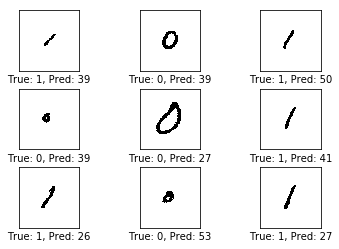

Confusion Matrix:
[496   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   3   0   0   0   0   0   0   0   0   0   0   1   0   0   0
   0   0   0   0   0   0   0   0] (0) 0
[  0 495   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   1   2   0   0   0   0   0   0   0   0
   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   1
   0   0   0   0   0   0   0   0] (1) 1
[  0   0 500   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0] (2) 2
[  0   0   0 500   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [54]:
print_test_accuracy(show_example_errors=True,
                    show_confusion_matrix=True)

In [55]:
potential_acc=30696/31000
print(potential_acc)

0.9901935483870967


In [56]:
save_path = os.path.join(save_dir, 'best_test')
saver.restore(sess=session, save_path=save_path)

INFO:tensorflow:Restoring parameters from checkpoints/best_test


In [57]:
print_accuracy_test()

Accuracy on test-set: 1.5%


In [60]:
save_path = os.path.join(save_dir, 'best_test-2')
saver.restore(sess=session, save_path=save_path)

INFO:tensorflow:Restoring parameters from checkpoints/best_test-2


In [61]:
print_accuracy_test()

Accuracy on test-set: 99.7%**
